<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/mnist_classification_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape,  x_test.shape, y_test.shape, 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
 y_train[4], x_train[4]

(9, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [4]:
import matplotlib.pyplot as plt

3


(None, numpy.uint8)

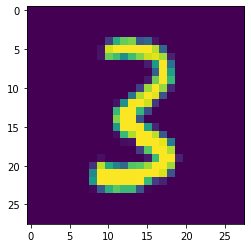

In [5]:
plt.imshow(x_train[50000])
print(y_train[50000]), type(y_train[50000])

In [6]:
x_train = x_train.reshape(-1, 28*28)
x_train.shape

(60000, 784)

In [7]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [8]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [9]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [10]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784, ))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 softmax, binary -> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # hidden layer

# regression -> loss : mse
# binary classification -> loss : binary crossentropy
# over 3 classification -> loss : categorical crossentropy(sparse_categorical_crossentropy)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [17]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 2.2708 - acc: 0.7812 - val_loss: 0.5673 - val_acc: 0.8536
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4569 - acc: 0.8872 - val_loss: 0.5196 - val_acc: 0.8731
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3799 - acc: 0.9041 - val_loss: 0.3895 - val_acc: 0.9213
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3389 - acc: 0.9182 - val_loss: 0.3558 - val_acc: 0.9142
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2881 - acc: 0.9286 - val_loss: 0.3294 - val_acc: 0.9268
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2780 - acc: 0.9325 - val_loss: 0.3385 - val_acc: 0.9242
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2494 - acc: 0.9392 - val_loss: 0.2845 - val_acc: 0.9327
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [20]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
import matplotlib.pyplot as plt

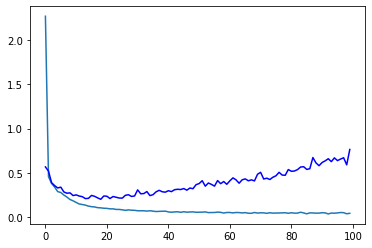

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

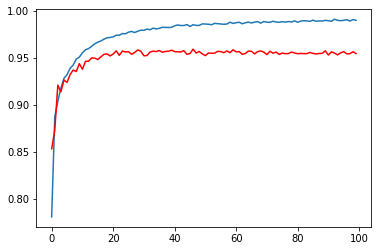

In [32]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [33]:
y_test[30]

3

In [34]:
model.predict(x_test[30,:])

ValueError: ignored